# Normal regression + regressions with regulatization

In [89]:
#Standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
sns.set(style='whitegrid', palette='muted')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8
import time

#Sklearn
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA


In [90]:
# Imports data
X = pd.read_csv('x.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
X

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1992-01-04,0.373032,0.275060,0.083938,0.664201,0.601652,0.769184,0.748975,0.760298,0.940532,1.843950,...,-0.215571,0.077728,0.083014,-0.583570,0.175899,1.2,3.714687,-0.584329,0.134978,16.1885
1992-01-05,0.532885,0.549297,0.514589,-0.873850,0.546742,0.324748,0.546363,0.580914,0.647050,3.074505,...,0.097556,-0.255295,-0.251432,-0.072648,-0.088998,2.0,-5.294144,0.020679,0.410802,14.7280
1992-01-06,0.417254,0.444719,0.269590,1.048664,0.280383,0.059695,-0.239920,-0.304895,-0.484071,-1.398611,...,0.318864,0.023712,0.250035,0.795664,-0.088298,1.2,4.562073,0.881246,-0.087417,14.7531
1992-01-07,-0.079646,-0.134642,0.334203,1.330298,0.708002,0.893837,0.995847,1.126762,1.294361,2.614598,...,-0.233369,0.264845,-0.416910,-1.518733,-0.000307,-3.8,-0.352309,-0.854378,0.216749,13.3036
1992-01-08,0.386454,0.380539,0.246840,-1.603560,0.324124,-0.549192,-0.106279,-0.111965,0.036867,-0.863906,...,-0.032213,-0.285966,0.499100,1.157537,0.086992,-0.5,-0.633643,1.163376,0.042164,14.4223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,-0.013781,-0.019171,-0.193846,1.490076,-0.719328,-1.550613,-1.202485,-0.846966,-0.623823,-1.031771,...,-0.613838,0.175427,-0.107940,0.300155,-0.590025,2.9,-0.283245,-0.123254,0.880929,21.7702
2023-01-01,0.087570,0.130699,1.316033,0.190398,2.764501,1.003181,0.343776,-0.014901,-0.334291,0.217564,...,1.425376,0.033243,0.170724,-0.004386,0.309575,5.2,0.071035,0.049043,-0.142513,20.2269
2023-01-02,0.103913,-0.004103,-0.028459,-0.417590,-0.660515,-0.005561,-0.196666,-0.129562,0.097723,0.212525,...,-0.416042,-0.224790,-0.417543,-0.152983,-0.621376,2.1,-0.237727,-0.068985,-0.121427,20.2141


In [91]:
y = pd.read_csv('y.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
print(y.shape)
y = y.iloc[:,0]
y

(373, 1)


sasdate
1992-01-05    0.214977
1992-01-06    0.285919
1992-01-07    0.285104
1992-01-08    0.213295
1992-01-09    0.212842
                ...   
2023-01-01    0.515742
2023-01-02    0.369323
2023-01-03    0.053028
2023-01-04    0.367109
2023-01-05    0.124049
Name: Inflation, Length: 373, dtype: float64

# PCA

In [92]:
steps_X = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
           ('pca', PCA(n_components = 1, random_state=1))]

pl_pca_X = Pipeline(steps_X)

X_pca_model = pl_pca_X.fit(X)

print('n_components:', 1, '  ', 'variance explained:', '%.3f' %X_pca_model.steps[1][1].explained_variance_ratio_.sum())

X_pca = X_pca_model.transform(X)

n_components: 1    variance explained: 0.223


In [94]:
for n_comp in [1]:

    steps_X = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = n_comp, random_state=1))]
    
    pl_pca_X = Pipeline(steps_X)
    X_pca_model = pl_pca_X.fit(X)
    
    print('n_components:', n_comp, '  ', 'variance explained:', '%.3f' %X_pca_model.steps[1][1].explained_variance_ratio_.sum())


n_components: 1    variance explained: 0.223


In [95]:
n_train = 334   # 2013-M12
n_records = len(X)
n_forecast = n_records-n_train

j = 0
for i in range(n_train, n_records):    
    #train, test = X[0:i], X[i:i+1]   #expanding window
    train, test = X[j:i], X[i:i+1]   #rolling window
    print('train=%d, test=%d' % (len(train), len(test)))
    j += 1

train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1
train=334, test=1


# Grid search

In [96]:
# pipeline
def pipeline(config):

    # unpack config
    n_comps = config

    # Steps
    steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
             ('pca', PCA(n_components = n_comps, random_state=1)),
             ('ols', LinearRegression())
            ]

    pipeline = Pipeline(steps)

    return pipeline

In [97]:
def walk_forward_validation(cfg):
    
    n_train = 334

    n_records = len(X)

    y_test_list = []
    
    y_pred_list = []

    j = 0

    for i in range(n_train, n_records):
    
        X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
       
        model = pipeline(cfg).fit(X_train, y_train)        
    
        y_pred = model.predict(X_test)
    
        y_pred_list.extend(y_pred)
    
        y_test_list.extend(y_test)

        j += 1
    
    score_rmse = metrics.mean_squared_error(y_test_list, y_pred_list, squared=False)
    
    print(' > %.3f' % score_rmse)
    
    return score_rmse 

In [98]:
# score a model, return None on failure
def repeat_evaluate(config, n_repeats=1):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(config) for _ in range(n_repeats)]
    # summarize score
    result = np.mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

In [99]:
# grid search configs
def grid_search(cfg_list):
    # evaluate configs
    scores = [repeat_evaluate(cfg) for cfg in cfg_list]
    # sort configs by score_rmse, asc
    #scores.sort(key=lambda tup: tup[1])
    scores.sort(key=lambda tup: tup[1], reverse=True)
    return scores

In [100]:
# create a list of configs to try
def model_configs():
    # define scope of configs
      
    n_comps = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30]
    #n_comps = [10]
     
    # create configs
    configs = list()
    
    for k in n_comps:
        cfg = k
        configs.append(cfg)

    print('Total configs: %d' % len(configs))
    return configs

In [101]:
# model configs
cfg_list = model_configs()

Total configs: 18


In [102]:
cfg_list = model_configs()
# grid search
scores = grid_search(cfg_list)
print('done')

Total configs: 18
 > 0.526
> Model[1] 0.526
 > 0.534
> Model[2] 0.534
 > 0.505
> Model[3] 0.505
 > 0.450
> Model[4] 0.450
 > 0.449
> Model[5] 0.449
 > 0.448
> Model[6] 0.448
 > 0.450
> Model[7] 0.450
 > 0.452
> Model[8] 0.452
 > 0.439
> Model[9] 0.439
 > 0.413
> Model[10] 0.413
 > 0.393
> Model[11] 0.393
 > 0.396
> Model[12] 0.396
 > 0.384
> Model[13] 0.384
 > 0.382
> Model[14] 0.382
 > 0.378
> Model[15] 0.378
 > 0.389
> Model[20] 0.389
 > 0.382
> Model[25] 0.382
 > 0.407
> Model[30] 0.407
done


In [103]:
scores

[('2', 0.533917935495685),
 ('1', 0.526130680673851),
 ('3', 0.5045551338444927),
 ('8', 0.4519558177893861),
 ('4', 0.45038422621190577),
 ('7', 0.45006827806914645),
 ('5', 0.4489015496321753),
 ('6', 0.4475230025214592),
 ('9', 0.43909450286365964),
 ('10', 0.4128500066108555),
 ('30', 0.4066409252843996),
 ('12', 0.39582118698844554),
 ('11', 0.3934342284957711),
 ('20', 0.3886698781837128),
 ('13', 0.3841722640522821),
 ('25', 0.38219387975741115),
 ('14', 0.3816573981991538),
 ('15', 0.3777485498532089)]

# Model Estimation & Evaluation

In [104]:
# Pipeline

# Steps
steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = 13, random_state=1)),
               ('ols', LinearRegression())
              ]

pipeline_final = Pipeline(steps_final)

In [105]:
start=time.time()    
   
n_train = 334

n_records = len(X)

y_test_list = []
    
y_pred_list = []

j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1
    
end=time.time()

print("Running Time:", end - start)

Running Time: 0.3202359676361084


In [106]:
pd.options.display.max_rows=300
result = pd.DataFrame({'GDP_growth_Actual': y[-n_forecast:], 'GDP_growth_Predicted': y_pred_list}, columns=['GDP_growth_Actual', 'GDP_growth_Predicted'])
result

,GDP_growth_Actual,GDP_growth_Predicted
sasdate,,
2020-01-03,-0.434504,0.122724
2020-01-04,-0.790333,-0.597570
2020-01-05,-0.087507,-0.413068
2020-01-06,0.435992,0.709697
2020-01-07,0.501492,0.647235
2020-01-08,0.437715,0.301230
2020-01-09,0.237949,0.239791
2020-01-10,0.098786,0.091493
2020-01-11,0.202265,0.094598


<AxesSubplot:xlabel='sasdate'>

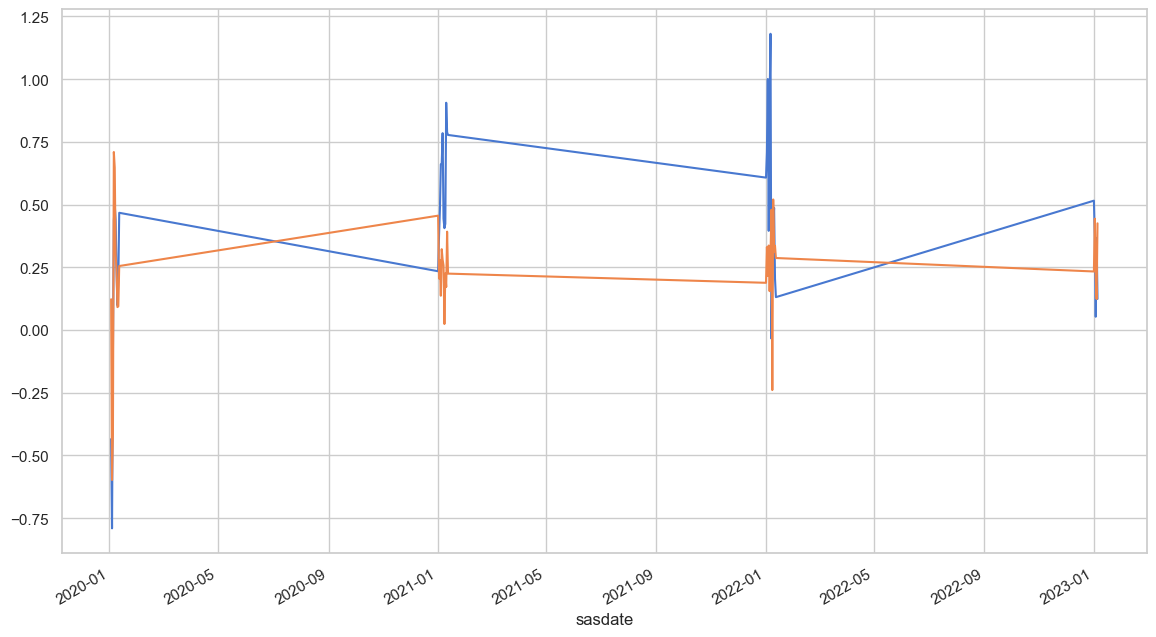

In [107]:
result['GDP_growth_Actual'].plot()
result['GDP_growth_Predicted'].plot()

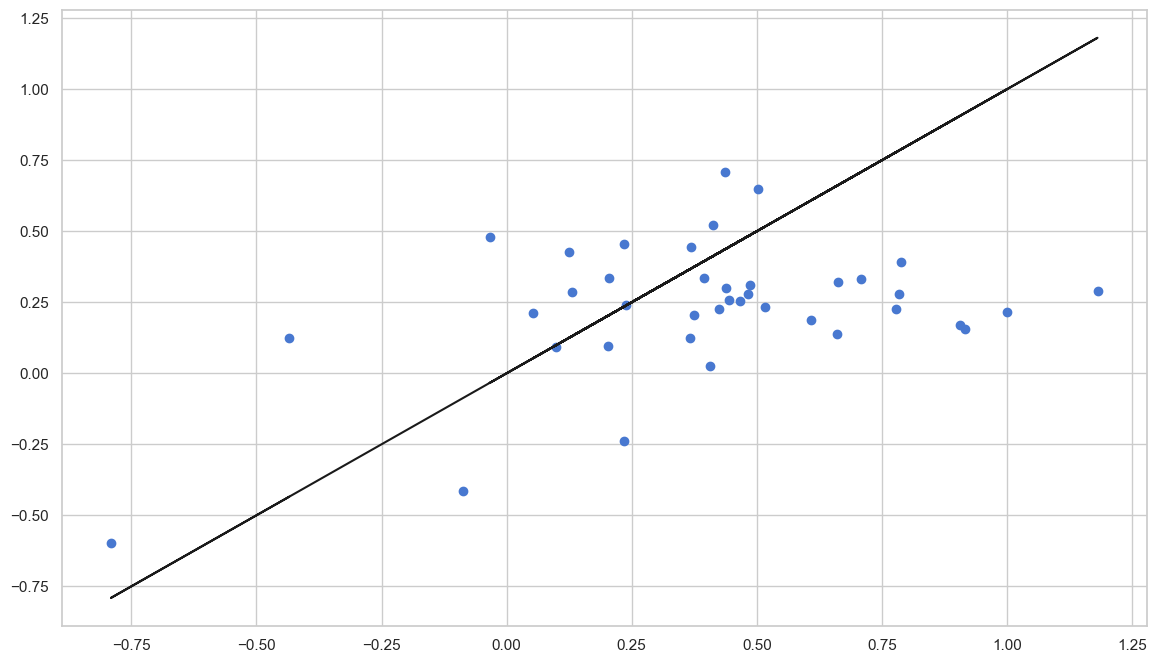

In [108]:
plt.scatter(y_test_list, y_pred_list)
plt.plot(y_test_list, y_test_list,'k-') # identity line

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [110]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)             #True = yi; Predicted = y-hat
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))    #rmse = root mean squared error
    r_squared = metrics.r2_score(true, predicted)
    print('MAE:', mae)                                             
    print('RMSE:', rmse)
    print('R-squared', r_squared)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r_squared = metrics.r2_score(true, predicted)
    return mae, rmse, r_squared        

# Linear regression

In [111]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)     # Train the model

pred = lin_reg.predict(X_test)   # Test your model

train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print('====================================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)


Train set evaluation:
_____________________________________
MAE: 0.1155044505315549
RMSE: 0.14681735522377154
R-squared 0.7276492059112823
__________________________________
Test set evaluation:
_____________________________________
MAE: 0.404362507522905
RMSE: 1.065975202303146
R-squared -17.013252038410826
__________________________________


In [80]:
coeff_lin = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Linear: Coef'])
coeff_lin


,Linear: Coef
RPI,0.082454
W875RX1,-0.086430
DPCERA3M086SBEA,0.116243
CMRMTSPLx,-0.046489
RETAILx,-0.027138
...,...
UMCSENTx,-0.006097
DTCOLNVHFNM,0.009302
DTCTHFNM,-0.006654
INVEST,-0.029304


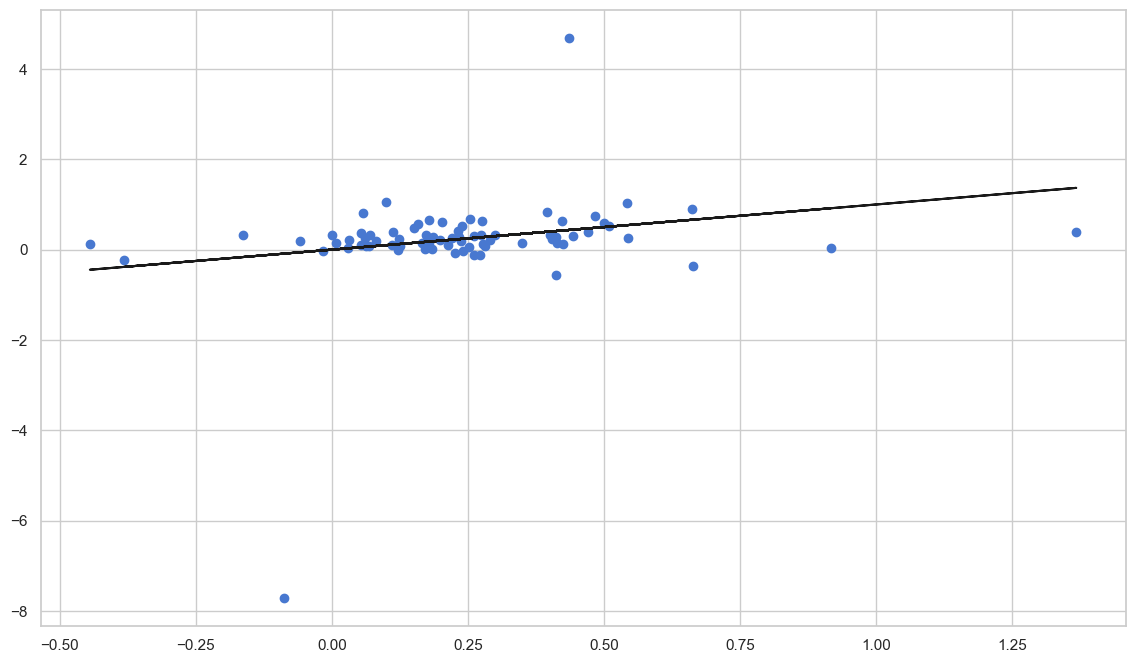

In [79]:
plt.scatter(y_test, pred)
plt.plot(y_test,y_test,'k-') # identity line

results_df_lin = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'RMSE', 'R-squared'])
results_df_lin

# Ridge regression

In [22]:
ridge = Ridge(alpha=1000)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

train_pred = ridge.predict(X_train)
test_pred = ridge.predict(X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print('====================================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

Train set evaluation:
_____________________________________
MAE: 0.15667988783771483
RMSE: 0.2189841970939004
R-squared 0.3941021608538876
__________________________________
Test set evaluation:
_____________________________________
MAE: 0.17131475587775116
RMSE: 0.25953028135158546
R-squared -0.06776085946113142
__________________________________


In [24]:
coeff_ridge = pd.DataFrame(ridge.coef_, x.columns, columns=['Ridge: Coef'])
pd.concat([coeff_lin, coeff_ridge],axis=1)

,Linear: Coef,Ridge: Coef
RPI,0.082454,-0.001392
W875RX1,-0.086430,-0.004413
DPCERA3M086SBEA,0.116243,0.000633
CMRMTSPLx,-0.046489,-0.000522
RETAILx,-0.027138,0.006158
...,...,...
UMCSENTx,-0.006097,-0.007956
DTCOLNVHFNM,0.009302,0.003038
DTCTHFNM,-0.006654,-0.001413
INVEST,-0.029304,-0.004117


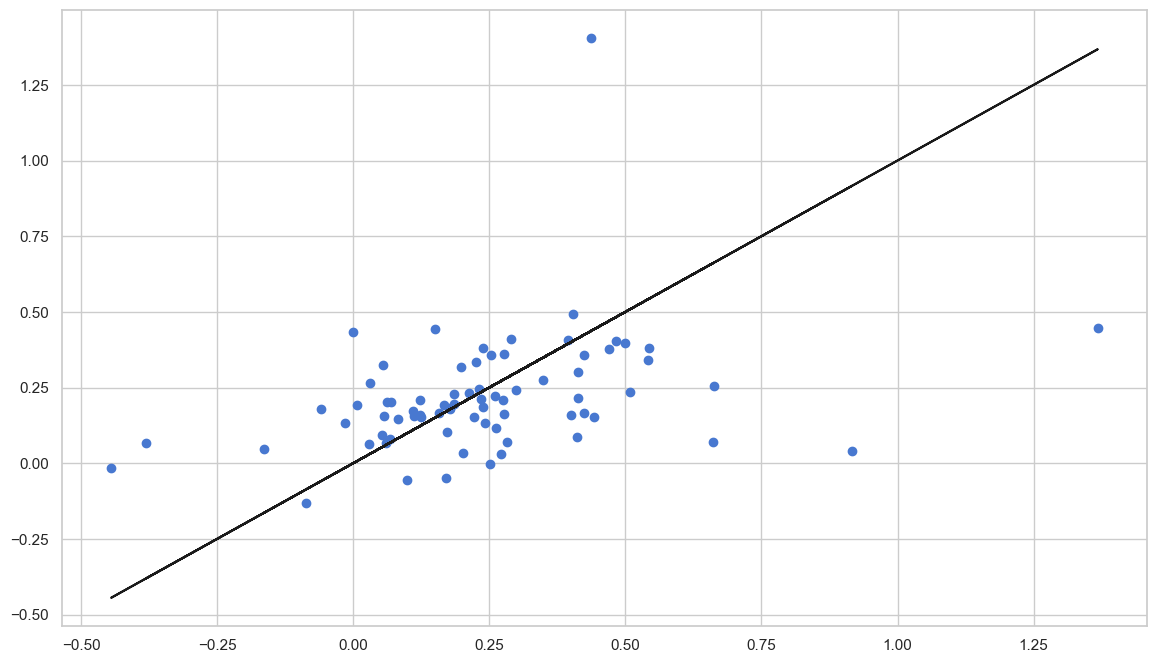

In [25]:
plt.scatter(y_test, pred)
plt.plot(y_test,y_test,'k-') # identity line

In [26]:
results_df_ridge = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'RMSE', 'R-squared'])
results_df_ridge

pd.concat([results_df_lin, results_df_ridge], axis=0, ignore_index=True)

,Model,MAE,RMSE,R-squared
0,Linear Regression,0.404363,1.065975,-17.013252
1,Ridge Regression,0.171315,0.259530,-0.067761


# Lasso regression

In [27]:
lasso = Lasso(alpha=30000)
lasso.fit(X_train, y_train)

train_pred = lasso.predict(X_train)
test_pred = lasso.predict(X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print('====================================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)


Train set evaluation:
_____________________________________
MAE: 0.18302495602066193
RMSE: 0.2813280743037695
R-squared 0.0
__________________________________
Test set evaluation:
_____________________________________
MAE: 0.17273974522284746
RMSE: 0.25442194444242183
R-squared -0.026141038693088703
__________________________________


In [29]:
coeff_lasso = pd.DataFrame(lasso.coef_, x.columns, columns=['Lasso: Coef'])
pd.concat([coeff_lin, coeff_ridge, coeff_lasso],axis=1)

,Linear: Coef,Ridge: Coef,Lasso: Coef
RPI,0.082454,-0.001392,-0.0
W875RX1,-0.086430,-0.004413,-0.0
DPCERA3M086SBEA,0.116243,0.000633,0.0
CMRMTSPLx,-0.046489,-0.000522,0.0
RETAILx,-0.027138,0.006158,0.0
...,...,...,...
UMCSENTx,-0.006097,-0.007956,0.0
DTCOLNVHFNM,0.009302,0.003038,0.0
DTCTHFNM,-0.006654,-0.001413,-0.0
INVEST,-0.029304,-0.004117,-0.0


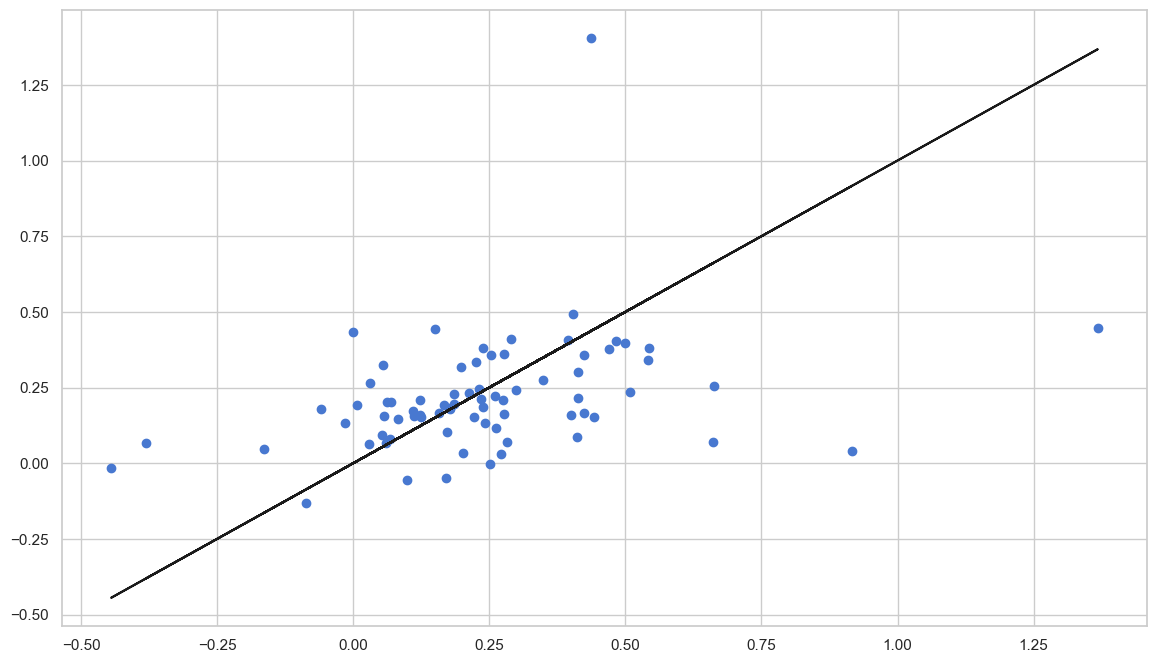

In [30]:
plt.scatter(y_test, pred)
plt.plot(y_test,y_test,'k-') # identity line

In [31]:
results_df_lasso = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'RMSE', 'R-squared'])

pd.concat([results_df_lin, results_df_ridge, results_df_lasso], axis=0, ignore_index=True)

,Model,MAE,RMSE,R-squared
0,Linear Regression,0.404363,1.065975,-17.013252
1,Ridge Regression,0.171315,0.259530,-0.067761
2,Lasso Regression,0.172740,0.254422,-0.026141


# Elastic Net

In [32]:
elastic = ElasticNet(alpha=100, l1_ratio=0.5, max_iter=30000)
elastic.fit(X_train, y_train)

test_pred = elastic.predict(X_test)
train_pred = elastic.predict(X_train)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print('====================================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

Train set evaluation:
_____________________________________
MAE: 0.18302495602066193
RMSE: 0.2813280743037695
R-squared 0.0
__________________________________
Test set evaluation:
_____________________________________
MAE: 0.17273974522284746
RMSE: 0.25442194444242183
R-squared -0.026141038693088703
__________________________________


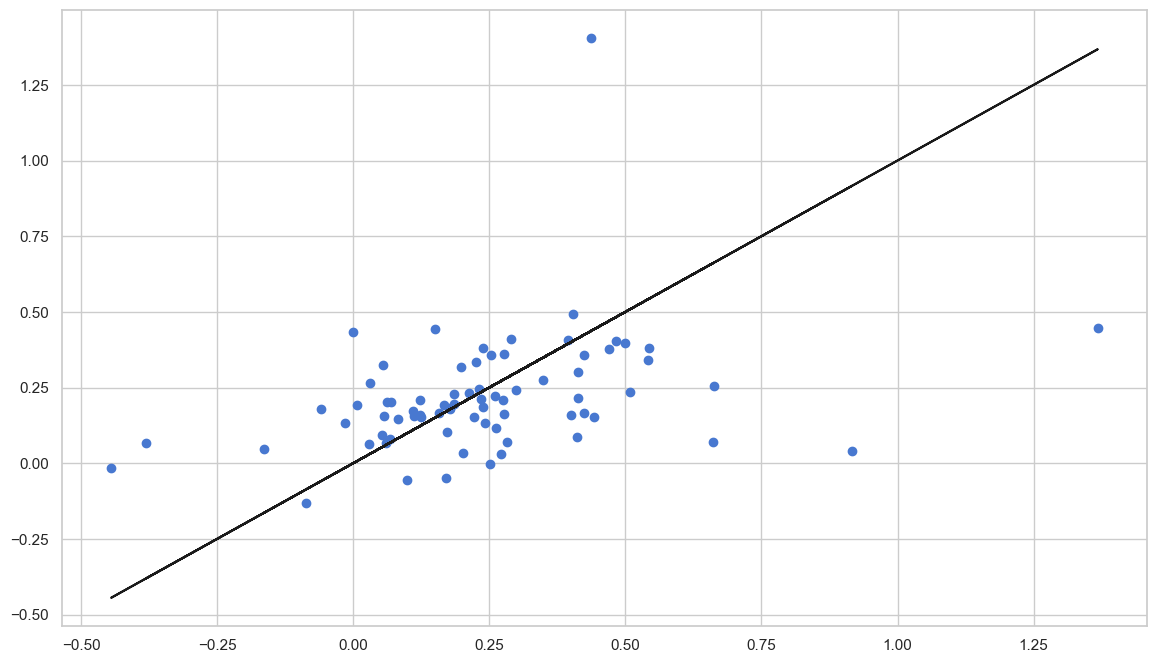

In [34]:
plt.scatter(y_test, pred)
plt.plot(y_test,y_test,'k-') # identity line

In [33]:
coeff_elastic = pd.DataFrame(elastic.coef_, x.columns, columns=['Elastic Net: Coef'])
pd.concat([coeff_lin, coeff_ridge, coeff_lasso, coeff_elastic],axis=1)

,Linear: Coef,Ridge: Coef,Lasso: Coef,Elastic Net: Coef
RPI,0.082454,-0.001392,-0.0,-0.0
W875RX1,-0.086430,-0.004413,-0.0,-0.0
DPCERA3M086SBEA,0.116243,0.000633,0.0,0.0
CMRMTSPLx,-0.046489,-0.000522,0.0,0.0
RETAILx,-0.027138,0.006158,0.0,0.0
...,...,...,...,...
UMCSENTx,-0.006097,-0.007956,0.0,0.0
DTCOLNVHFNM,0.009302,0.003038,0.0,0.0
DTCTHFNM,-0.006654,-0.001413,-0.0,-0.0
INVEST,-0.029304,-0.004117,-0.0,-0.0


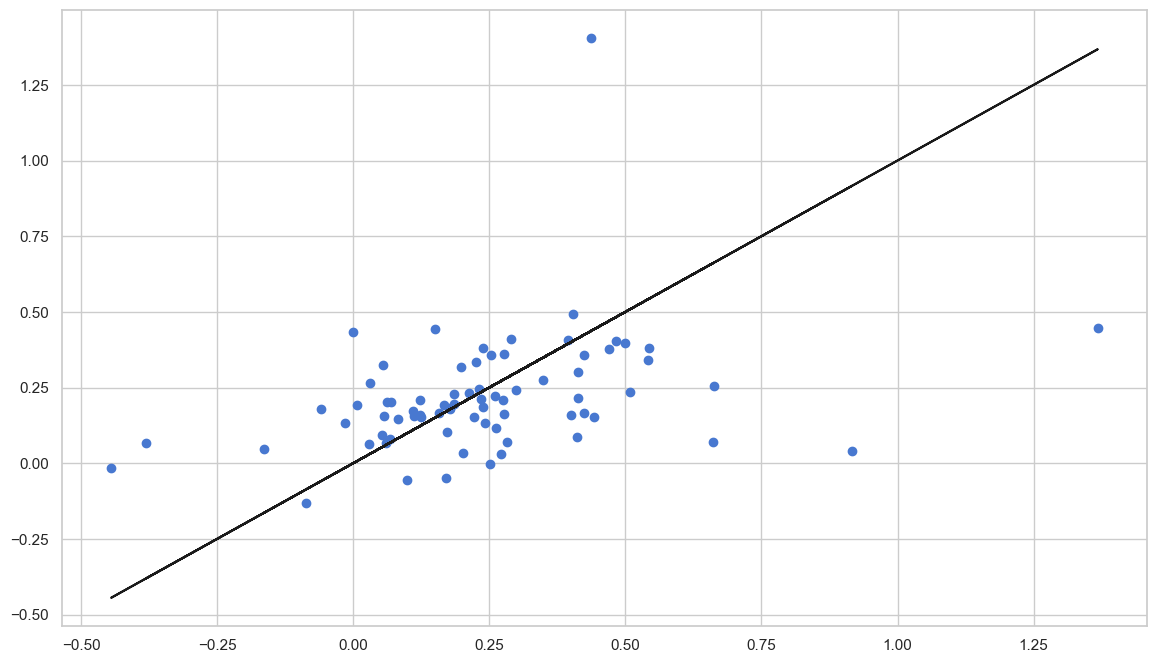

In [36]:
plt.scatter(y_test, pred)
plt.plot(y_test,y_test,'k-') # identity line

In [37]:
results_df_elastic = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'RMSE', 'R-squared'])

pd.concat([results_df_lin, results_df_ridge, results_df_lasso, results_df_elastic], axis=0, ignore_index=True)

,Model,MAE,RMSE,R-squared
0,Linear Regression,0.404363,1.065975,-17.013252
1,Ridge Regression,0.171315,0.259530,-0.067761
2,Lasso Regression,0.172740,0.254422,-0.026141
3,Elastic Net Regression,0.172740,0.254422,-0.026141
